In [5]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [9]:
# Data collection and processing

In [11]:
gold_data = pd.read_csv("gld_price_data.csv")

In [13]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [18]:
gold_data.shape

(2290, 6)

In [20]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [22]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
#get stats of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [32]:
#correlation
# positive and negative

numeric_gold_data = gold_data.select_dtypes(include=[float, int])
correlation = numeric_gold_data.corr()

<Axes: >

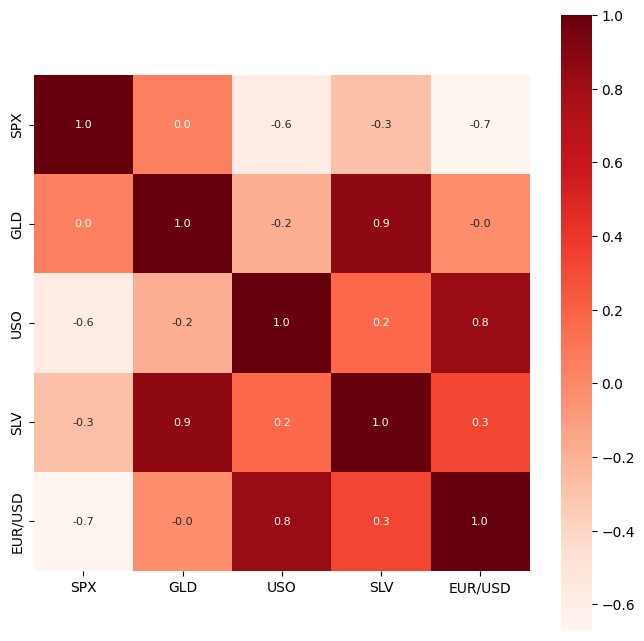

In [39]:
#onstruct heatmap
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={"size": 8}, cmap='Reds')

In [41]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Krishnanand PS\AppData\Local\Temp\ipykernel_9732\1515452846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

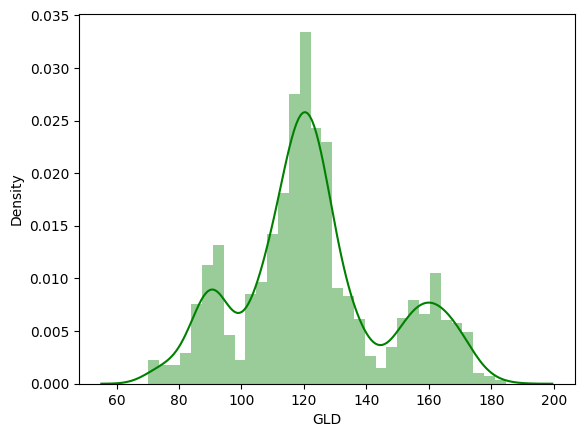

In [45]:
#check distribution of gld price 
sns.distplot(gold_data['GLD'],color="green")

In [49]:
#splitting features and target 

X= gold_data.drop(['Date','GLD'], axis=1)
y= gold_data['GLD']
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [73]:
#splitting training and test data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=2)

In [74]:
#model training: random forest
regressor= RandomForestRegressor(n_estimators=100)

In [75]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
#model evaluation
#prediction on test data
test_data_preds=regressor.predict(X_test)
test_data_preds

array([168.58319965,  81.9661996 , 115.89030009, 127.56330105,
       120.42690153, 154.71859724, 149.82789791, 126.01410005,
       117.38829864, 125.85760119, 116.95860072, 172.59330105,
       141.85659856, 167.92549801, 115.16389997, 117.57850029,
       138.64320282, 170.02540123, 159.29610329, 158.95689916,
       155.26930002, 125.30590059, 176.8286991 , 156.92910326,
       125.3758002 ,  93.85319975,  77.30000038, 120.73360002,
       118.9929983 , 167.42319989,  88.05440072, 125.50760055,
        91.20000069, 117.60870015, 121.09369867, 136.55660085,
       115.29450125, 115.38800078, 146.0162999 , 107.14330128,
       104.33090227,  87.21109785, 126.5237004 , 117.93730023,
       155.06349978, 119.68600022, 108.32940008, 107.89809831,
        93.22630028, 127.10539798,  74.91280031, 113.67139934,
       121.34390036, 111.24259909, 118.8616991 , 120.87389924,
       159.01659996, 166.52510099, 146.94859664,  85.52469851,
        94.18150059,  86.91799849,  90.38520018, 118.89

In [78]:
#R squared error
error_score= metrics.r2_score(y_test, test_data_preds)
error_score

0.9899193505606371

In [79]:
y_test= list(y_test)

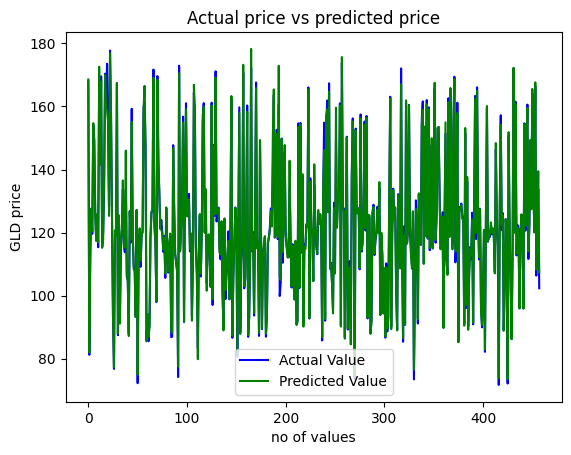

In [81]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_preds,color='green',label='Predicted Value')
plt.title("Actual price vs predicted price")
plt.xlabel("no of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()